![title](ipl.png)

# Data Analasis of IPL Match

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the Data of matches

In [2]:
df=pd.read_csv("matches.csv")

In [3]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


# Get a concise summary of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.6+ KB


# Get the Numbers of missing values in the dataset

In [5]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

# Calculating some statistical data like percentile, mean and std by describe()

In [6]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


# Get the Column Labels of the Data by .columns

In [7]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Get the number of matches played in Last 5 Years in individual variables.

In [8]:
matches_2017=df[df['season']==2017]
matches_2016=df[df['season']==2016]
matches_2015=df[df['season']==2015]
matches_2014=df[df['season']==2014]
matches_2013=df[df['season']==2013]

# Store the numbers of matches played in Last 5 years in individual variables by .shape[0] 

In [9]:
no_of_matches17=matches_2017.shape[0]
no_of_matches16=matches_2016.shape[0]
no_of_matches15=matches_2015.shape[0]
no_of_matches14=matches_2014.shape[0]
no_of_matches13=matches_2013.shape[0]
last_5_yrs=no_of_matches17+no_of_matches16+no_of_matches15+no_of_matches14+no_of_matches13

# Print the No. of matches played in last 5 years and sum of all the matches played in last 5 years

In [10]:
print("Number of Matches Played in 2017 IPL Edition: ",no_of_matches17)
print("Number of Matches Played in 2016 IPL Edition: ",no_of_matches16)
print("Number of Matches Played in 2015 IPL Edition: ",no_of_matches15)
print("Number of Matches Played in 2014 IPL Edition: ",no_of_matches14)
print("Number of Matches Played in 2013 IPL Edition: ",no_of_matches13)
print("Total No. of Matches Played in Last 5 Years: ",last_5_yrs)

Number of Matches Played in 2017 IPL Edition:  59
Number of Matches Played in 2016 IPL Edition:  60
Number of Matches Played in 2015 IPL Edition:  59
Number of Matches Played in 2014 IPL Edition:  60
Number of Matches Played in 2013 IPL Edition:  76
Total No. of Matches Played in Last 5 Years:  314


# Bar graph of last 5 years matches  

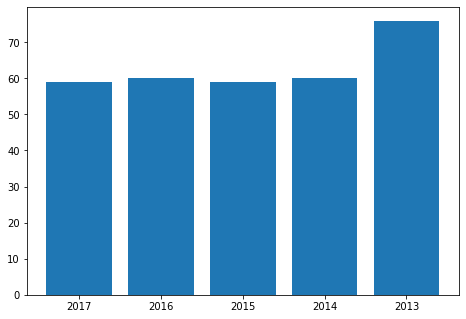

In [11]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
lab=['2017','2016','2015','2014','2013']
data_bar=[59,60,59,60,76]
ax.bar(lab,data_bar)
plt.show()

# How Many percentage of matches palyed in last 5 years?

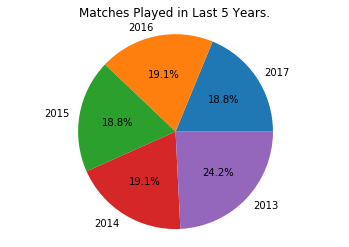

In [12]:
my_data=[no_of_matches17,no_of_matches16,no_of_matches15,no_of_matches14,no_of_matches13]
my_labels='2017','2016','2015','2014','2013'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%',radius=2)
plt.title('Matches Played in Last 5 Years.')
plt.axis('equal')
plt.show()

# Bar Graph of Toss Decisions (Batting or Feilding)

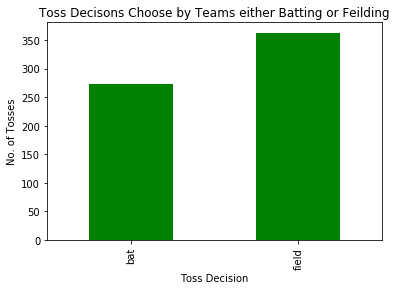

In [13]:
choice_series=df.groupby(df.toss_decision).toss_decision.count()
choice_series.plot(kind='bar',color='green')
plt.xlabel("Toss Decision") 
plt.ylabel("No. of Tosses") 
plt.title("Toss Decisons Choose by Teams either Batting or Feilding") 
plt.show()

# Top 5 Players who become the man of the match

In [14]:
played=df.groupby(df.player_of_match).player_of_match.count().sort_values(ascending=False).head(5)
played

player_of_match
CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
Name: player_of_match, dtype: int64

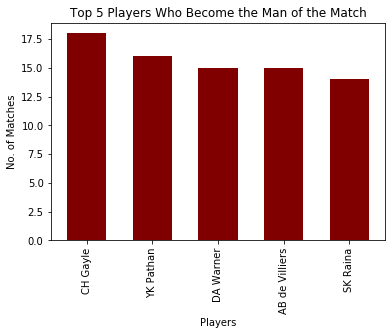

In [15]:
played.plot(kind='bar',color ='maroon',width = 0.6)
plt.xlabel("Players") 
plt.ylabel("No. of Matches") 
plt.title("Top 5 Players Who Become the Man of the Match") 
plt.show()

# What percentage of matches are won by toss winners?

In [16]:
winner_df=df[df['winner']==df['toss_winner']]
winner_per=(winner_df.shape[0]/df.shape[0])*100
print("Matches Won by Toss Winners: ",winner_per,"%")

Matches Won by Toss Winners:  51.100628930817614 %


# What percentages of matches are won after fielding first?

In [17]:
df1=df[['toss_winner','toss_decision','winner']]
df1.head()

,toss_winner,toss_decision,winner
0,Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,Rising Pune Supergiant,field,Rising Pune Supergiant
2,Kolkata Knight Riders,field,Kolkata Knight Riders
3,Kings XI Punjab,field,Kings XI Punjab
4,Royal Challengers Bangalore,bat,Royal Challengers Bangalore


In [18]:
equal=df[df['toss_winner']==df['winner']]
equal.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN


In [19]:
p=equal[df.toss_decision=='field']
print('No. of Matches Won After Fielding First: ',p.shape[0])

No. of Matches Won After Fielding First:  201


C:\Users\Sourabh\Anacond\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [20]:
games_won_field_first=(p.shape[0]/df.shape[0])*100
print('Percentages of Matches Won After Fielding First: ',games_won_field_first,'%')

Percentages of Matches Won After Fielding First:  31.60377358490566 %


# Know a particular team how many times wins the Tosses, Toss and Match and Loose the Match.

In [21]:
team=str(input("Enter Team Name: "))
win=df[df['toss_winner']==team]
print("\n")
print(win.shape[0],"Times",team,"Wins the Toss.")
result=win[win['winner']==team]
print(result.shape[0],"Times",team,"Wins the Match as Well As Toss.")
loose=win.shape[0]-result.shape[0]
print(loose,"Times",team,"Loose the Match.")

Enter Team Name: Chennai Super Kings


66 Times Chennai Super Kings Wins the Toss.
42 Times Chennai Super Kings Wins the Match as Well As Toss.
24 Times Chennai Super Kings Loose the Match.


# Percentage of Matches of Win and Loose of a Particular Team

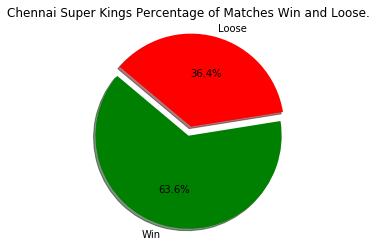

In [22]:
labels='Win','Loose'
sizes=[result.shape[0],loose]
colors=['green','red']
explode=(0.1,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.title(team+' Percentage of Matches Win and Loose.')
plt.axis('equal')
plt.show()

# Analysis on Total Match Winning of a Team

In [23]:
te=str(input("Enter the Team Name: "))
match_win=df[df['winner']==te]
print(match_win.shape[0]," Times ",te,"Wins the Match.")
match_win

Enter the Team Name: Chennai Super Kings
79  Times  Chennai Super Kings Wins the Match.


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
60,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
70,71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
73,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
86,87,2008,Delhi,2008-05-08,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Feroz Shah Kotla,Aleem Dar,RB Tiffin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,547,2015,Chennai,2015-04-28,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Chennai Super Kings,2,0,DJ Bravo,"MA Chidambaram Stadium, Chepauk",RM Deshpande,VA Kulkarni,NaN
553,554,2015,Chennai,2015-05-04,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",C Shamshuddin,K Srinath,NaN
562,563,2015,Chennai,2015-05-10,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,12,0,RA Jadeja,"MA Chidambaram Stadium, Chepauk",M Erasmus,CK Nandan,NaN
568,569,2015,Chandigarh,2015-05-16,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab,bat,normal,0,Chennai Super Kings,0,7,P Negi,"Punjab Cricket Association Stadium, Mohali",CK Nandan,C Shamshuddin,NaN


# A player how many times become Man of the Match

In [24]:
player=str(input("Enter Player's Name: "))
man=df[df['player_of_match']==player]
print(man.shape[0],"Times",player,"becomes the Man of the Match.")
man

Enter Player's Name: MS Dhoni
13 Times MS Dhoni becomes the Man of the Match.


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
24,25,2017,Pune,2017-04-22,Sunrisers Hyderabad,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,6,MS Dhoni,Maharashtra Cricket Association Stadium,AY Dandekar,A Deshmukh,NaN
73,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
86,87,2008,Delhi,2008-05-08,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Feroz Shah Kotla,Aleem Dar,RB Tiffin,NaN
143,144,2009,East London,2009-05-04,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,normal,0,Chennai Super Kings,78,0,MS Dhoni,Buffalo Park,BR Doctrove,M Erasmus,NaN
181,182,2010,Kolkata,2010-03-16,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Chennai Super Kings,55,0,MS Dhoni,Eden Gardens,HDPK Dharmasena,AM Saheba,NaN
227,228,2010,Dharamsala,2010-04-18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,MS Dhoni,Himachal Pradesh Cricket Association Stadium,BF Bowden,AM Saheba,NaN
288,289,2011,Chennai,2011-05-12,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Chennai Super Kings,18,0,MS Dhoni,"MA Chidambaram Stadium, Chepauk",AM Saheba,SL Shastri,NaN
378,379,2012,Bangalore,2012-05-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,38,0,MS Dhoni,M Chinnaswamy Stadium,BF Bowden,HDPK Dharmasena,NaN
413,414,2013,Chennai,2013-04-25,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,5,MS Dhoni,"MA Chidambaram Stadium, Chepauk",Aleem Dar,S Das,NaN
421,422,2013,Pune,2013-04-30,Chennai Super Kings,Pune Warriors,Chennai Super Kings,bat,normal,0,Chennai Super Kings,37,0,MS Dhoni,Subrata Roy Sahara Stadium,S Das,SJA Taufel,NaN


# Perform some operations in 2017 match data only.

# Percentage of matches are won by toss winners in 2017.

In [25]:
win=matches_2017[matches_2017['winner']==matches_2017['toss_winner']]
win_per=(win.shape[0]/matches_2017.shape[0])*100
print('Matches Won by Toss Winners in 2017: ',win_per,'%')

Matches Won by Toss Winners in 2017:  57.6271186440678 %


# Who won the final match of 2017?

In [26]:
lst_match=matches_2017.tail(1)
lst_match['winner'] 

58    Mumbai Indians
Name: winner, dtype: object

# Which two teams reached the finals in 2017?

In [27]:
lst_match[['team1','team2']]

,team1,team2
58,Mumbai Indians,Rising Pune Supergiant


# Who is the Man of The Match in the Last match of 2017?

In [28]:
print('Man of the Match of Last Match: ',lst_match['player_of_match'])

Man of the Match of Last Match:  58    KH Pandya
Name: player_of_match, dtype: object


# How many matches used Duckworth Lewis method?

In [29]:
DL_used=matches_2017[matches_2017['dl_applied']==1]
DL_used

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
56,57,2017,Bangalore,2017-05-17,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,NaN


# What percentages of matches are won after fielding first in 2017 matches?

In [30]:
matches_2017=matches_2017[['toss_winner','toss_decision','winner']]
matches_2017.head()

,toss_winner,toss_decision,winner
0,Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,Rising Pune Supergiant,field,Rising Pune Supergiant
2,Kolkata Knight Riders,field,Kolkata Knight Riders
3,Kings XI Punjab,field,Kings XI Punjab
4,Royal Challengers Bangalore,bat,Royal Challengers Bangalore


In [31]:
equal17=matches_2017[matches_2017['toss_winner']==matches_2017['winner']]
equal17.head()

,toss_winner,toss_decision,winner
1,Rising Pune Supergiant,field,Rising Pune Supergiant
2,Kolkata Knight Riders,field,Kolkata Knight Riders
3,Kings XI Punjab,field,Kings XI Punjab
4,Royal Challengers Bangalore,bat,Royal Challengers Bangalore
5,Sunrisers Hyderabad,field,Sunrisers Hyderabad


In [32]:
p17=equal17[matches_2017.toss_decision=='field']
print('No. of Matches Won After Fielding First: ',p17.shape[0])

No. of Matches Won After Fielding First:  28


C:\Users\Sourabh\Anacond\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [33]:
games_won_field_first17=(p17.shape[0]/matches_2017.shape[0])*100
print('Percentages of Matches Won After Fielding First in 2017: ',games_won_field_first17,'%')

Percentages of Matches Won After Fielding First in 2017:  47.45762711864407 %


# Find all NaN values in winner column, so that we update this as draw

In [34]:
df[pd.isnull(df['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


# Update the NaN values as Draw

In [35]:
df['winner'].fillna('Draw',inplace=True)

In [36]:
df.loc[300,'winner']

'Draw'

#Replacing the Rising Pune Supergiant with Rising Pune Supergiants

In [37]:

df["team2"]=df["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["team1"]=df["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["winner"]=df["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["toss_winner"]=df["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")


# Replace all the team names by their short names

In [38]:
df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore',
            'Deccan Chargers','Chennai Super Kings','Rajasthan Royals',
            'Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Sunrisers Hyderabad',
            'Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors'],
           ['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)

In [39]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Give all teams a specific integer

In [40]:
encode={'team1':{'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
        'team2':{'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
        'toss_winner':{'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
        'winner':{'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
df.replace(encode,inplace=True)

In [41]:
df.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


# Find cities which are null

In [42]:
df[pd.isnull(df['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


# City is also null, this is mainly for Dubai stadium. Hence update the City as Dubai
#Make sure to impute the data(cleansing and finding missing data), there is also other process 
#to verify expected value based on other resultants, for now by stadium, city is easily manually updated

In [43]:
df['city'].fillna('Dubai',inplace=True)

In [44]:
df.loc[461,'city']

'Dubai'

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               636 non-null object
date               636 non-null object
team1              636 non-null int64
team2              636 non-null int64
toss_winner        636 non-null int64
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             636 non-null int64
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(9), object(8)
memory usage: 89.6+ KB


In [46]:
df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [47]:
xx=df.groupby(["toss_winner"]).size()
print(xx.get_value(1))
yy=df.groupby(["winner"]).size()
print(yy.get_value(1))

85
92


C:\Users\Sourabh\Anacond\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Sourabh\Anacond\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [48]:
xx

toss_winner
1     85
2     78
3     70
4     43
5     66
6     63
7     72
8     15
9     68
10    35
11    13
12     8
13    20
dtype: int64

In [49]:
yy

winner
1     92
2     77
3     73
4     29
5     79
6     63
7     62
8     13
9     70
10    42
11    15
12     6
13    12
14     3
dtype: int64

In [50]:
#we maintain a dictionary for future reference mapping teams
dicVal=encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(11)]) #find key by value search 

1
RPS


In [51]:
df=df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3


In [52]:
dff=pd.DataFrame(df)
dff.describe()

,team1,team2,toss_winner,winner
count,636.000000,636.000000,636.000000,636.000000
mean,5.540881,5.511006,5.371069,5.309748
std,3.329169,3.341677,3.293140,3.288726
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,9.000000,8.000000,7.250000,8.000000
max,13.000000,13.000000,13.000000,14.000000


In [53]:
dff["city"].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai'], dtype=object)

In [54]:
cat_list2=dff["toss_decision"]
encoded_data2,mapping_index2=pd.Series(cat_list2).factorize()
print(encoded_data2)
print(mapping_index2)
print(mapping_index2.get_loc("field"))

[0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1
 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0
 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0
 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1
 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1
 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0
 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1
 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 

In [55]:
#Find some stats on the match winners and toss winners
temp1=dff['toss_winner'].value_counts(sort=True)
temp2=dff['winner'].value_counts(sort=True)

#Mumbai won most toss and also most matches
print('No of toss winners by each team:')
for idx, val in temp1.iteritems():
    print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))


No of toss winners by each team:
MI -> 85
KKR -> 78
DD -> 72
RCB -> 70
KXIP -> 68
CSK -> 66
RR -> 63
DC -> 43
SRH -> 35
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8


In [56]:
temp1

1     85
2     78
7     72
3     70
9     68
5     66
6     63
4     43
10    35
13    20
8     15
11    13
12     8
Name: toss_winner, dtype: int64

In [57]:
print('\nNo of match winners by each team:')
for idx, val in temp2.iteritems():
    print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))


No of match winners by each team:
MI -> 92
CSK -> 79
KKR -> 77
RCB -> 73
KXIP -> 70
RR -> 63
DD -> 62
SRH -> 42
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 3


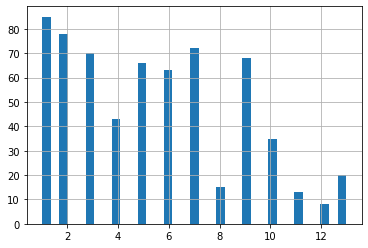

In [58]:
df['toss_winner'].hist(bins=35)

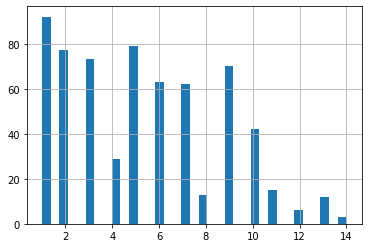

In [59]:
#shows that Mumbai won most matches followed by Chennai
df['winner'].hist(bins=35)

Text(0.5, 1.0, 'Match Winners')

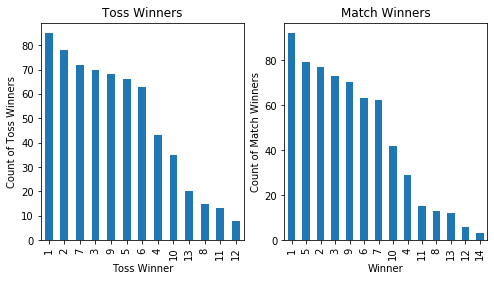

In [60]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Toss Winner')
ax1.set_ylabel('Count of Toss Winners')
ax1.set_title("Toss Winners")
temp1.plot(kind='bar')

ax2=fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Winner')
ax2.set_ylabel('Count of Match Winners')
ax2.set_title("Match Winners")

# Find the null values in every column

In [61]:
dff.apply(lambda x: sum(x.isnull()),axis=0)

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

# Building predictive model, convert categorical to numerical data

In [62]:
from sklearn.preprocessing import LabelEncoder
var_mod=['city','toss_decision','venue']
le=LabelEncoder()
for i in var_mod:
    dff[i]=le.fit_transform(dff[i])
dff.head(10)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,14,1,3,23,10
1,1,11,25,1,11,16,11
2,8,2,27,1,2,25,2
3,11,9,15,1,9,11,9
4,3,7,2,0,3,14,3
5,8,10,14,1,10,23,10
6,2,1,22,1,1,34,1
7,3,9,15,0,3,11,9
8,7,11,25,1,11,16,7
9,10,1,22,1,1,34,1


# Import models from sklearn:

In [63]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [64]:
from sklearn.model_selection import KFold


# Generic function for making a classification model and accessing performance:

In [65]:
def classification_model(model, data, predictors, outcome):
      model.fit(data[predictors],data[outcome])
      predictions=model.predict(data[predictors])
      print(predictions)
      accuracy=metrics.accuracy_score(predictions,data[outcome])
      print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

# Logistic Regression

In [66]:
outcome_var=['winner']
predictor_var=['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model=LogisticRegression()
classification_model(model,dff,predictor_var,outcome_var)

C:\Users\Sourabh\Anacond\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sourabh\Anacond\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sourabh\Anacond\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[ 9  1  1  9  5  9  1  5 10  1  2  3  9  7  7  1  9  5  9  1  6  2  2  1
 10  9  1  9  2  3  2  9  2  1  9  9  1 10  9  7  9  9  9  3  3  9  5  9
  7  1  7  7  1 10  5  9  9  3  5  3  9  5  1  2  6  5  3  3  9  3  5  1
  9  5  1  2  6  1  5  1  6  2  5  3  3  2  9  2  1  3  9  1  9  5  2  1
  9  2  1  7  1  1  2  3  2  1  5  3  3  5  3  2  1  5  6  6  2  3  5  9
  5  1  2  5  5  3  5  1  1  5  2  1  6  1  5  6  6  2  5  1  3  1  1  2
  9  5  1  3  6  5  7  2  1  1  2  1  6  9  5  1  9  1  1  9  5  6  5  2
  5  3  6  9  1  1  2  2  9  2  5  9  5  2  3  3  5  7  3  2  5  9  2  3
  9  2  5  5  9  6  1  5  2  5  5  2  6  5  2  7  5  1  5  6  2  3  5  1
  3  7  1  1  2  5  1  5  9  3  2  9  5  1  2  2  2  2  5  3  6  5 10  2
  6  3  9 10  1  1  6  5  6 10  2  7  5  6  2  9  1  1  9  1  9  9  2  2
  7  3  1  3 10  2  9  5  1  9  1  5  8  2  3  3  2  1  5  9  6  9  9  1
  5  9  3  1  9  7  2  5  9  2  1  3 10  3  1  1  1  1  5  3  2  9  9  3
  2  1 10  2  3  3  1  5  9  2  5 10  2  5  1  5  6

# Applying KNN Algorithm

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
classification_model(model,dff,predictor_var,outcome_var)

C:\Users\Sourabh\Anacond\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[10  3  3  9  3 10  1  9 11  1  2  1  9  2  9  9  3  2 10  3 10  2  8  1
 11  9  3 11  2  3  2 10  2  1  9 10  1 11  7  2  7  9 11  1  2  8 10  9
  7  9  7  7  1 11  4 11  2  1 10  3  5  5  1  2  6  7  5  6  9  3  5  1
  9  5  1  3  9  6  5  4  1  1  6  3  5  1  5  2  6  1  5  2  6  9  2  1
  9  3  1  9  6  1  5  7  5  9  5  9  1  5  3  2  6  7  6  1  6  1  1  9
  4  4  2  4  7  2  3  3  2  7  3  1  5  4  9  5  5  1  3  5  3  2  4  5
  4  3  2  5  5  7  2  4  1  4  5  3  1  3  3  3  9  1  4  3  7  4  3  2
  3  7  3  2  4  4  1  1  6  2  3  6  3  2  1  3  7  4  6  1  4  5  1  3
  9  1  6  1  3  6  1  2  1  5  7  2  2  5  1  2  7  4  1  6  2  3  1  4
  3  9  6  4  1  5  6  5  4  1  2  4  4  2  1  3  2  5  2  6  3  1 13  2
  6  1  9 13  4  6  1  5  9  4  2  4  4  1  2  9  1  3  9  1  6  5  3  2
  3  3  6  3  4  2  6  5  1 10  1  5  1  2  6  3  2  1  3 10  6 10  9  6
  5  9  3  1  9  6  2  2  5  2  1  4  7  3  1  5  1  1  5  5  6 11  6  7
  1  6 13  1  3  7  1  5  9  2  4 13  2  3  1  6  3

# SVM

In [68]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model=svm.SVC(kernel='rbf',C=1,gamma=1) 
outcome_var=['winner']
predictor_var=['team1','team2','venue','toss_winner','city','toss_decision']
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
classification_model(model,dff,predictor_var,outcome_var)

C:\Users\Sourabh\Anacond\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1  3  2  9  3 10  1  8  1
 11  9  3 11  2  3  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  9
  7  9  7 10  1 11  3 11  2  1  1  3  5  7  1  2  6  7  5  6  9  6  5  1
  9  5  1  3  9  6  5  3  9  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  6  1  5  3  6  9  5  9  1  5  3  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  3  4  7  9  4  1  6  3  9  7  5  1  3  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  6  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  5  6  2  3  1  4
  3  9  6  4  1  5  3  5  4  1  2  5  4  1  1  5  3  5  2  6  3  1 13  2
  6  1  9 13  4  6 12  5  9  7  2  1  4  1 12  9  1  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  6 13  9  6
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  5  7 13  6  3
  5  6  9  1  3  7  1  5  9  2  4  5  2  6  1  6  3

# Decision Tree Algorithm

In [69]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, dff,predictor_var,outcome_var)

[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1  3  2  9  3 10  1  8  1
 11  9  3 11  2  3  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  2
  7  9  7 10  1 11  3 11  2  1  1  3  5  6  1  2  6  7  1  6  9  6  5  1
  9  5  1  3  9  6  5  3  2  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  3  1  5  3  6  9  5  9  1  5  3  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  3  4  7  9  4  1  6  3  9  7  5  1  3  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  6  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  1  6  2  3  1  4
  3  9  6  4  1  5  3  5  4  1  2  5  4  1  1  5  3  5  2  6  3  1 13  2
  6  1  9 13  4  6 12  5  9  7  2 12  4  1 12  9  1  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  5 13  9  3
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  1  7 13  6  3
  5  6  9  1  3  7  1  5  9  2  4  5  2  6  1  6  3

# Random Forest Classifier

In [70]:
model=RandomForestClassifier(n_estimators=100)
outcome_var=['winner']
predictor_var=['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model,dff,predictor_var,outcome_var)

C:\Users\Sourabh\Anacond\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1 11  2 10  3 10  1  8  1
 11  9  3 11  2  3  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  2
  7  9  7 10  1 11  3 11  2  1  1  3  5  7  1  2  6  7  1  6  9  6  5  1
  9  5  1  3  9  6  5  3  2  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  3  1  5  3  6  9  5  9  1  5  3  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  9  4  7  9  4  1  6  3  9  7  5  1  9  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  7  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  5  6  2  3  9  4
  3  9  6  4  1  5  3  5  4  1  2  5  4  1  1  5  3  5  2  6  3  1 13  2
  6  1  9 13  4  6 12  5  9  7  2 12  4  1 12  9  1  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  6 13  9  3
  5  9  3  4  9 12  4  9  5  2  6  4 14  5  1  5  1  3  5  1  7 13  6  3
  5  6 13  1  3  7  1  5  9  2  4 13  2  6  1  6  3

# CONCLUSION


1. We analyse numbers of matches in last 5 years:-
        	In 2013 – 76 Matches
        	In 2014 – 60 Matches
        	In 2015 – 59 Matches
        	In 2016 – 60 Matches
        	In 2017 – 59 Matches
2. Numbers of teams who choose Batting or Fielding over toss winning:-
        	Batting		250-300 Tosses
        	Fielding		More than 350

3. Top 5 players who becomes Man of The Match between 2008 to 2017:-
        	CH Gayle		18
        	YK Pathan		16
        	DA Warner	15
        	AB de Villiers	15
        	SK Raina		14

4. 51% matches are won by toss winners.

5. 31% of matches are won after fielding first.

6. Performance of a particular team in history of IPL:-
        Team: Chennai Super Kings
        66 Times Chennai Super Kings wins the Toss.
        42 Times Chennai Super Kings wins the match as well as toss.
        24 Times Chennai Super Kings loose the match.

 
7. Performance of a particular player in history of IPL:-
        Player: MS Dhoni
        13 times MS Dhoni becomes the man of the match.


